<a href="https://colab.research.google.com/github/Manjirii07/mlproject/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df=df.drop(['CustomerID','Gender','Age'],axis=1)

In [ ]:
df


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
df.isnull().sum()

,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
x = df.iloc[:,[0,1]].values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [ ]:
x.shape

(200, 2)

Finding the number of clusters using the Elbow Method

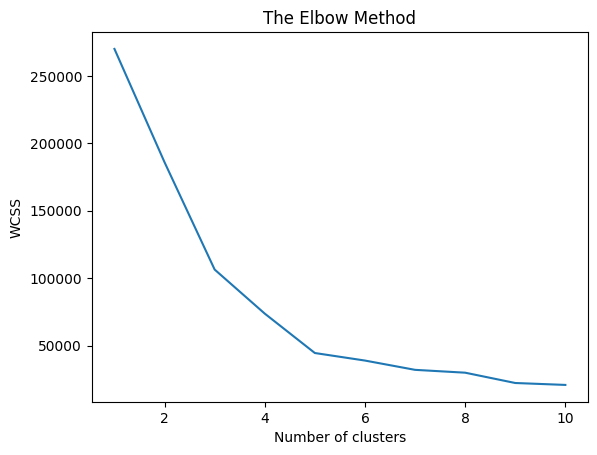

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

Use KneeLocator to find the optimal number of clusters

In [ ]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
float(kl.elbow)

5.0

In [ ]:
kmeansmodel = KMeans(n_clusters=5,init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)

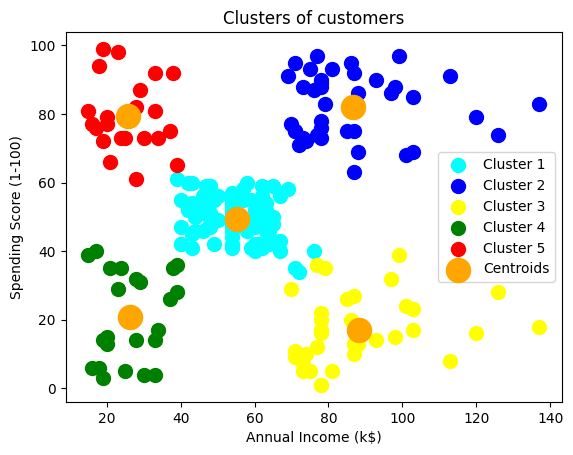

In [ ]:
plt.scatter(x[y_kmeans ==0,0],x[y_kmeans==0,1],s=100,c='cyan',label='Cluster 1')
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans==2,1],s=100,c='yellow',label='Cluster 3')
plt.scatter(x[y_kmeans ==3,0],x[y_kmeans==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(x[y_kmeans ==4,0],x[y_kmeans==4,1],s=100,c='red',label='Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],s=300,c='orange',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()